In [9]:
import qancode
from matplotlib import pyplot as plt
import numpy as np
import textwrap as tw

# Enter the demo URL below

In [10]:
rc_url= 'https://v100rc2.demo.encodedcc.org/'

# Measure response times and plot results
Change the value of `num_trials` or add queries to `item_types` as needed.

You can also add `output_path='/your/path/file.txt'` parameter to check_response_time() if you want to specify it; otherwise it will save check_response_time.txt on the desktop. Add `alt_format=True` to output an additional, reformatted output log.

In [11]:
%%capture --no-stderr --no-display output
prod_url="https://test.encodedcc.org"
qa = qancode.QANCODE(rc_url=rc_url, prod_url=prod_url)
num_trials = 50
item_types = [
    "/search/?type=Experiment&biosample_ontology.term_name=whole+organism", 
    "/search/?type=Experiment&target.label=H3K4me3",
    "/search/?type=Experiment&assay_slims=DNA+methylation",
    "/search/?type=Experiment&status=released",
    "/matrix/?type=Experiment&status=released",
    "/search/?searchTerm=hippocampus",
    "/experiments/ENCSR079YAP/",
    "/experiments/ENCSR296ASC/",
    "/publication-data/ENCSR089EOA/",
    "/reference-epigenome-matrix/?type=Experiment&related_series.@type=ReferenceEpigenome&replicates.library.biosample.donor.organism.scientific_name=Homo+sapiens"
]
info = qa.check_response_time(item_types=item_types, n=num_trials, alt_format=True)

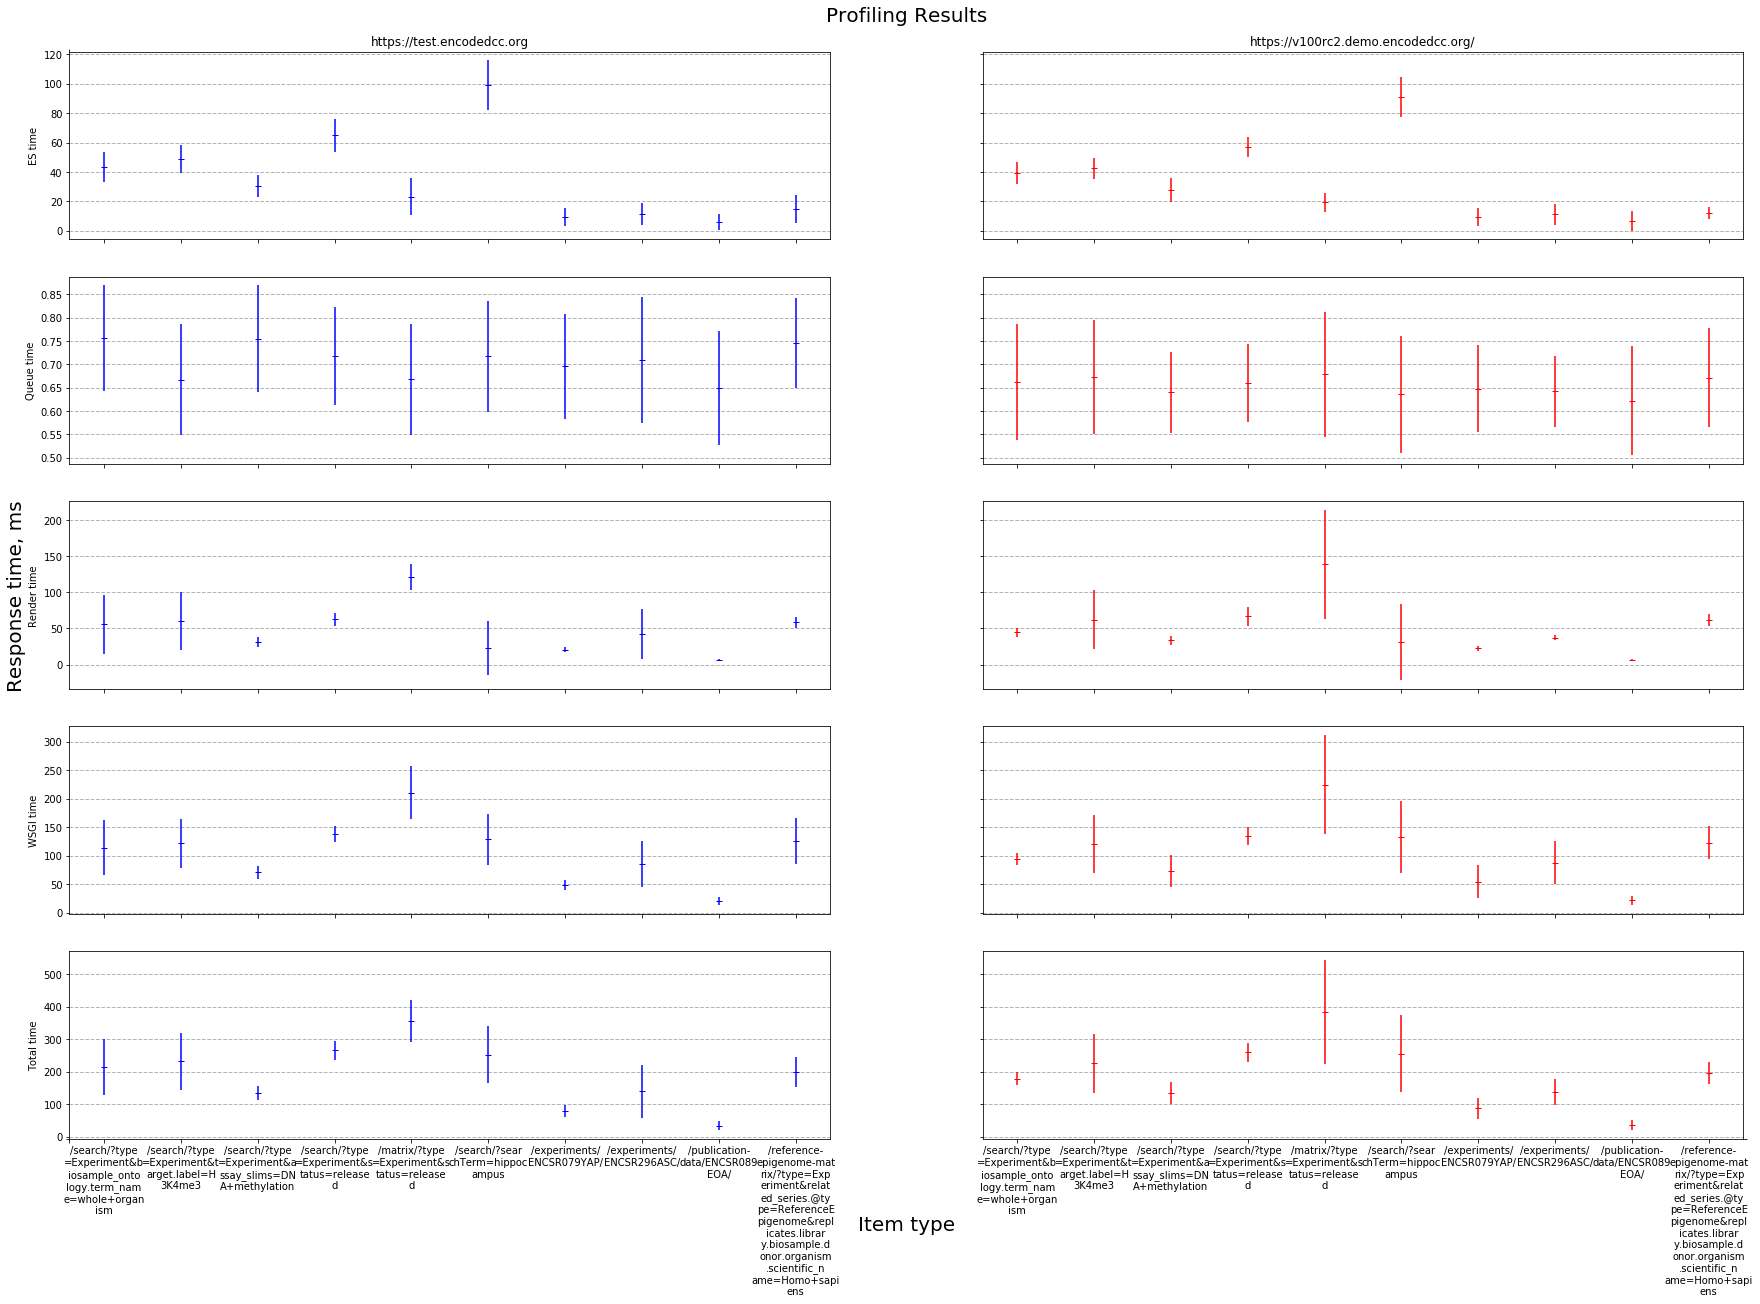

In [12]:
prod_url_short = prod_url.split('/')[2]
test_url_short = rc_url.split('/')[2]
xticklabels= []
response_time_types = ['es_time','queue_time','render_time','wsgi_time','total_time']

fig, axes = plt.subplots(5, 2, sharex=True, sharey='row', figsize=(max(12,3*len(item_types)), 20))
for i in range(0,5):
    axes[i,0].grid(True,axis='y',color='#B5B5B5', linestyle='--', linewidth=1)
    axes[i,1].grid(True,axis='y',color='#B5B5B5', linestyle='--', linewidth=1)

fig.add_subplot(111, frameon=False,xticks=[0],yticks=[0]) # Large plot for the Title
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)

plt.xlabel('Item type', fontsize=20, labelpad=60)
plt.ylabel('Response time, ms', fontsize=20, labelpad=30)
plt.title('Profiling Results', fontsize=20, pad=30)
x = np.arange(0, float(len(item_types)))

# Check response time returns a nested dict organized in this structure:
# {item_type: {url: {response_type: (average, stdev)}}}
# This iterates over each item_type and then response_type
i = 0
for item in info:
    xticklabels.append(tw.fill(item,13))
    for j in range(0,5):
        response_time_type = response_time_types[j]
        ax1 = axes[j, 0]
        ax2 = axes[j, 1]
        try:
            a = ax1.errorbar(
                x[i],
                info[item][prod_url_short][response_time_type][0], yerr=info[item][prod_url_short][response_time_type][1],
                fmt='_b',
                linestyle='')
            b = ax2.errorbar(
                x[i],
                info[item][test_url_short][response_time_type][0], yerr=info[item][test_url_short][response_time_type][1], 
                fmt='_r',
                linestyle='')
            #a[-1][0].set_linestyle('--')
            #b[-1][0].set_linestyle('--')
        except KeyError: # format=json queries don't have render time - this will fill in a 0 value for those.
            ax1.errorbar(x[i], 0, yerr=0, fmt='b_', linestyle='')
            ax2.errorbar(x[i], 0, yerr=0, fmt='b_', linestyle='')
    ax1.autoscale(axis='y')
    i = i+1

axes[0,0].set_title(prod_url)
axes[0,1].set_title(rc_url)
axes[0,0].set_ylabel('ES time')
axes[1,0].set_ylabel('Queue time')
axes[2,0].set_ylabel('Render time')
axes[3,0].set_ylabel('WSGI time')
axes[4,0].set_ylabel('Total time')
axes[4,0].set_xticks(x)
axes[4,0].set_xticklabels(xticklabels)
axes[4,1].set_xticklabels(xticklabels)
plt.savefig('/Users/jennifer/Desktop/fromnotebook.png',bbox_inches='tight')

Below are all the original commands from Kath, you can change these back to code cells if you want to run them.

qa.check_response_time(item_types=["/","/search/?type=Experiment"], n)

qa.check_response_time(item_types=["/search/?searchTerm=K562", "/search/?searchTerm=DNA+binding", "/search/?searchTerm=human", "/search/?searchTerm=H3K36me3", "/search/?searchTerm=CTCF"], n=100)

qa.check_response_time(item_types=['/ENCSR255XZG/', '/ENCSR749ILN/', '/ENCSR688GVV/', '/ENCSR301HAG/','/ENCSR315NAC/', '/ENCSR856JJB/'], n=100)

qa.check_response_time(item_types=['/ENCSR480OHP/','/ENCSR000EMB/','/ENCSR323QIP/','/ENCSR718AXQ/','/ENCSR165BGV/','/ENCSR384KAN/','/ENCSR330FXL/','/ENCSR825UNV/','/ENCSR089EOA/'], n=100)

qa.check_response_time(item_types=['/ENCAB830JLB/','/ENCAB000BKR/','/ENCAB284TTY/','/ENCAB294YUD/','/ENCAB000AOC/','/ENCAB301QZF/','/ENCAB000ANM/','/ENCAB000ANU/','/ENCAB445KMF/','/ENCAB000BAY/'], n=100)

qa.check_response_time(item_types=['/ENCBS787TFV/','/ENCBS676QAV/','/ENCBS996IWU/','/ENCBS913XJP/','/ENCBS565NTN/','/ENCBS896YZO/','/ENCBS280NYD/'], n=100)